In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score



In [ ]:
# Dataset root
DATASET_ROOT = "/content/drive/My Drive/Goslar_dataset_split"

TRAIN_DIR = os.path.join(DATASET_ROOT, "train")
VAL_DIR   = os.path.join(DATASET_ROOT, "val")
TEST_DIR  = os.path.join(DATASET_ROOT, "test")

IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 25
NUM_CLASSES = 4
SEED = 42


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)


In [ ]:
test_val_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    seed=SEED
)

val_generator = test_val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

test_generator = test_val_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

class_names = list(train_generator.class_indices.keys())
print("Classes:", class_names)


Found 1920 images belonging to 4 classes.
Found 240 images belonging to 4 classes.
Found 240 images belonging to 4 classes.
Classes: ['0', '1', '2', '3']


In [ ]:
IMG_SIZE = (128, 128, 3)
model = models.Sequential([
    # -------- BLOCK 1 --------
    layers.Conv2D(32, (3,3), padding="same", input_shape=IMG_SIZE),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(32, (3,3), padding="same"),  # Added second conv layer
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),  # Added dropout after pooling

    # -------- BLOCK 2 --------
    layers.Conv2D(64, (3,3), padding="same"),
    layers.BatchNormalization(),  # Re-enabled
    layers.Activation("relu"),
    layers.Conv2D(64, (3,3), padding="same"),  # Added second conv layer
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    # -------- BLOCK 3 --------
    layers.Conv2D(128, (3,3), padding="same"),
    layers.BatchNormalization(),  # Re-enabled
    layers.Activation("relu"),
    layers.Conv2D(128, (3,3), padding="same"),  # Added second conv layer
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    # -------- BLOCK 4 -------- (New deeper block)
    layers.Conv2D(256, (3,3), padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(256, (3,3), padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Flatten(),


    # -------- CLASSIFIER --------
    layers.Dense(512, activation="relu"),  # Increased from 256
    layers.BatchNormalization(),  # Added BN
    layers.Dropout(0.5),

    layers.Dense(256, activation="relu"),  # Increased from 128
    layers.BatchNormalization(),  # Added BN
    layers.Dropout(0.6),  # Re-enabled

    layers.Dense(NUM_CLASSES, activation="softmax")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),  # Increased from 1e-4
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 32, 32, 128)    │             

 Total params: 9,700,644 (37.01 MB)

 Trainable params: 9,697,188 (36.99 MB)

 Non-trainable params: 3,456 (13.50 KB)

In [ ]:
# model = models.Sequential([
#     layers.Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
#     layers.MaxPooling2D(2,2),

#     layers.Conv2D(64, (3,3), activation="relu"),
#     layers.MaxPooling2D(2,2),

#     layers.Conv2D(128, (3,3), activation="relu"),
#     layers.MaxPooling2D(2,2),

#     layers.Flatten(),
#     layers.Dense(128, activation="relu"),
#     layers.Dropout(0.3),
#     layers.Dense(256, activation="relu"),
#     layers.Dropout(0.5),
#     layers.Dense(NUM_CLASSES, activation="softmax")
# ])

# model.compile(
#     optimizer=Adam(learning_rate=1e-4),
#     loss="categorical_crossentropy",
#     metrics=["accuracy"]
# )

# model.summary()


In [ ]:
IMG_SIZE = (128, 128, 3)

model = models.Sequential([

    # -------- BLOCK 1 --------
    layers.Conv2D(32, (3,3), padding="same", input_shape=IMG_SIZE),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(2,2),

    # -------- BLOCK 2 --------
    layers.Conv2D(64, (3,3), padding="same"),
    #layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(2,2),

    # -------- BLOCK 3 --------
    layers.Conv2D(128, (3,3), padding="same"),
    #layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(2,2),


    layers.Flatten(),


    # -------- CLASSIFIER --------
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),

    layers.Dense(128, activation="relu"),
    #layers.Dropout(0.3),

    layers.Dense(NUM_CLASSES, activation="softmax")
])


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,515,652 (32.48 MB)

 Trainable params: 8,515,588 (32.48 MB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# early_stopping = EarlyStopping(
#     monitor='val_loss',
#     patience=5,
#     restore_best_weights=True,
#     verbose=1
# )

# checkpoint = ModelCheckpoint(
#     "best_model.h5",
#     monitor='val_loss',
#     save_best_only=True,
#     verbose=1
# )

# callbacks = [early_stopping, checkpoint]




callbacks = [
    ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    ),
    EarlyStopping(
        monitor='val_accuracy',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    ModelCheckpoint(
        'best_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,                 # large number (EarlyStopping decides actual stop)
    callbacks=callbacks
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.3300 - loss: 2.2442
Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to best_model.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 422s 7s/step - accuracy: 0.3313 - loss: 2.2388 - val_accuracy: 0.2500 - val_loss: 2.5358 - learning_rate: 0.0010
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4711 - loss: 1.5941
Epoch 2: val_accuracy did not improve from 0.25000
60/60 ━━━━━━━━━━━━━━━━━━━━ 347s 6s/step - accuracy: 0.4714 - loss: 1.5921 - val_accuracy: 0.2500 - val_loss: 3.0065 - learning_rate: 0.0010
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5242 - loss: 1.4105
Epoch 3: val_accuracy did not improve from 0.25000
60/60 ━━━━━━━━━━━━━━━━━━━━ 352s 6s/step - accuracy: 0.5244 - loss: 1.4088 - val_accuracy: 0.2500 - val_loss: 3.1939 - learning_rate: 0.0010
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5260 - loss: 1.2449
Epoch 4: val_accuracy did not improve from 0.25000
60/60 ━━━

In [ ]:
loss, acc = model.evaluate(test_generator)
print("Test accuracy:", acc)


8/8 ━━━━━━━━━━━━━━━━━━━━ 46s 6s/step - accuracy: 0.7031 - loss: 0.8404
Test accuracy: 0.7166666388511658


In [ ]:
def evaluate_model(generator, split_name):
    generator.reset()

    y_true = generator.classes
    y_pred_probs = model.predict(generator)
    y_pred = np.argmax(y_pred_probs, axis=1)

    print(f"\n📊 {split_name.upper()} RESULTS")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(
        y_true,
        y_pred,
        target_names=class_names,
        digits=4
    ))


In [ ]:
evaluate_model(test_generator, "Test")

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step

📊 TEST RESULTS
Accuracy: 0.7166666666666667
              precision    recall  f1-score   support

           0     0.7458    0.7333    0.7395        60
           1     0.6481    0.5833    0.6140        60
           2     0.7059    0.8000    0.7500        60
           3     0.7627    0.7500    0.7563        60

    accuracy                         0.7167       240
   macro avg     0.7156    0.7167    0.7150       240
weighted avg     0.7156    0.7167    0.7150       240



Text(0.5, 0, '# of epochs')

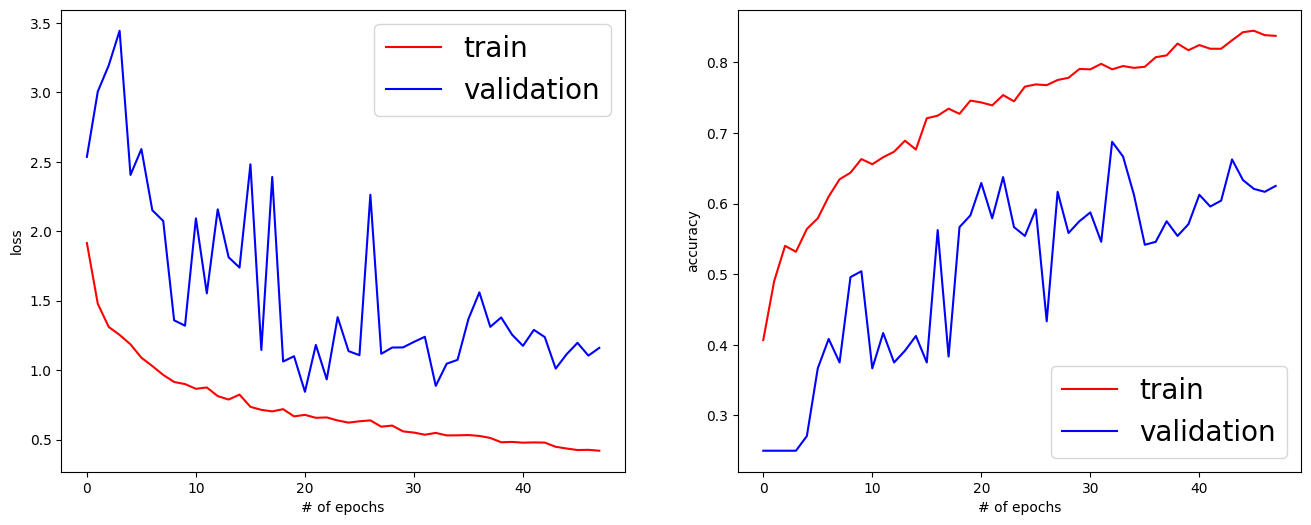

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
nepochs=len(history.history['loss'])
plt.plot(range(nepochs), history.history['loss'],     'r-', label='train')
plt.plot(range(nepochs), history.history['val_loss'], 'b-', label='validation')
plt.legend(prop={'size': 20})
plt.ylabel('loss')
plt.xlabel('# of epochs')
plt.subplot(1,2,2)
plt.plot(range(nepochs), history.history['accuracy'],     'r-', label='train')
plt.plot(range(nepochs), history.history['val_accuracy'], 'b-', label='validation')
plt.legend(prop={'size': 20})
plt.ylabel('accuracy')
plt.xlabel('# of epochs')

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(model, generator, class_names, title):
    """
    Plots confusion matrix for a given data generator
    """
    generator.reset()

    # Ground truth & predictions
    y_true = generator.classes
    y_pred_probs = model.predict(generator)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(7, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names
    )

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.tight_layout()
    plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step


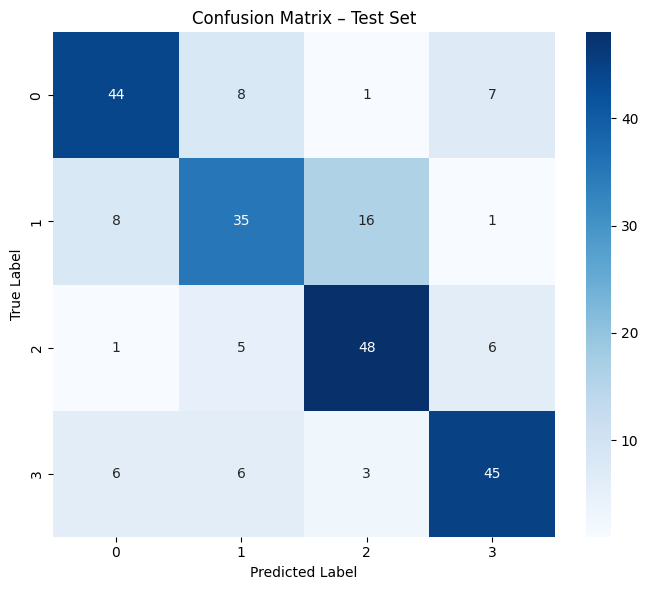

In [ ]:
plot_confusion_matrix(
    model,
    test_generator,
    class_names,
    title="Confusion Matrix – Test Set"
)
